# in this notebook

   
1. <a href="#1">Ordinal Encoding (mapper way)</a>
2. <a href="#2">LabelEncoder [Ordinal]  </a>
3. <a href="#3">One - Hot Encoding [Nominal]</a>
4. <a href="#4">Dummy Encoding [Nominal] </a>
5. <a href="#5">CatBoostEncoder [Nominal] </a>
6. <a href="#6">imput Missing values</a>
7. <a href="#7">Handling Outliears</a>
8. <a href="#8">Standardize a Features</a>
9. <a href="#9">Min Max Scalling</a>
10. <a href="#10">Handling imbalanced Classes </a>
11. <a href="#11">LDiscretize Features  </a>
12. <a href="#12">Known data (Skewed or Normal)  </a>
13. <a href="#13">Box-cox Transformation</a>
14. <a href="#14">Log Transformation</a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Different between Ordinal & Nominal data?
- [ Ordinal data] -- order data based on it's importance like [Low, Medium, High] --> Here Low less important from Medium & Medium Less important from High -- so [Low == 0], [Medium ==1], [High == 2], so numbers will appear the importance of each one.

- [ Nominal data] -- order data not based on it's importance like [Male, Female] --> Here Male not important from Female & Female not important from Male so when i put [Male == 0] & [Female == 1] like exactly when put [Male == 1] & [Female == 0] no different between them , i use nominal in [One-Hot, Dummy, CatBoost, label] Encoding.

## 1. <a name="1">Ordinal Encoding(mapper way)</a> 

#### 1) Manual way

In [2]:
# Create Dataframe
df = pd.DataFrame( {'Score': ['Low', 'Low', 'Medium', 'Medium', 'High']} )

# Create mapper
mapper = {'Low':1, 'Medium':2, 'High':3}
df['Score'] = df['Score'].replace(mapper)
df

,Score
0,1
1,1
2,2
3,2
4,3


#### 2) Sklearn way

In [3]:
import category_encoders as ce
df = pd.DataFrame( {'Score': ['Low', 'Low', 'Medium', 'Medium', 'High']} )

encoder = ce.OrdinalEncoder()
encoder.fit_transform(df)

ModuleNotFoundError: No module named 'category_encoders'

## 2. <a name="2">LabelEncoder [Ordinal]</a>

In [ ]:
from sklearn.preprocessing import LabelEncoder

#encoding 
df = pd.DataFrame( {'Score': ['Low', 'Low', 'Medium', 'Medium', 'High']} )
col_categ = ['Score']         # make in list because if there are a lot of categorical columns

my_encoder = LabelEncoder()
for i in col_categ:
    df[i] = my_encoder.fit_transform(df[i])

df

## 3. <a name="3">One-Hot Encoding [Nominal]</a>

In [ ]:
# never used with features which have alot of categorical values

import category_encoders as ce
# from sklearn.preprocessing import OneHotEncoder

# Create Dataframe:
DF = pd.DataFrame( {'Gender': ['Male', 'Female']} )

# Create object from OneHotEncoder:
encoder = ce.OneHotEncoder(cols='Gender',handle_unknown='return_nan',return_df=True,use_cat_names=True)

# OneHotEncoder data:
encoder.fit_transform(DF)

## 4. <a name="4">Dummy Encoding [Nominal] (The Same One-Hot Encoder but in Pandas)</a>

In [4]:
# never used with features which have alot of categorical values

# Create Dataframe:
DF = pd.DataFrame( {'Gender': ['Male', 'Female']} )

# Dummy Encoding:
pd.get_dummies(DF, drop_first=True) 

,Gender_Male
0,1
1,0


## 5. <a name="5">CatBoostEncoder [Nominal]</a>

In [5]:
# CatBoostEncoder must take [x_data & y_data] to fit them, then transform x-data which have categorial features

import category_encoders as ce

#encoding 
df = pd.DataFrame( {'Score': ['Low', 'Low', 'Medium', 'Medium', 'High'], 'target': [5,7,9,14,20]} )
x = df['Score']
y = df['target']

# Define catboost encoder
cbe_encoder = ce.cat_boost.CatBoostEncoder()
  
# Fit encoder and transform the features
cbe_encoder.fit(x, y)
encoded_df = cbe_encoder.transform(x)
encoded_df['target']=y       # to add the column which called y to encoded_df dataframe with new name [target]
encoded_df

ModuleNotFoundError: No module named 'category_encoders'

## 6. <a name="6">imput Missing values</a>

In [75]:
df = pd.DataFrame()

df['x'] = [5, 10, 9, 13, 2, 10, 65, 56, 22, 15, 1, 35]
df['y'] = [35, 10, 15, 22, 10, np.nan, 10, 2, 13, 9, 10, np.nan]

df

,x,y
0,5,35.0
1,10,10.0
2,9,15.0
3,13,22.0
4,2,10.0
5,10,NaN
6,65,10.0
7,56,2.0
8,22,13.0
9,15,9.0


In [76]:
# visualize observision which has nan values
df[df['y'].isna()]

,x,y
5,10,NaN
11,35,NaN


In [77]:
# check if there is nan values in df
df.isna().sum()

x    0
y    2
dtype: int64

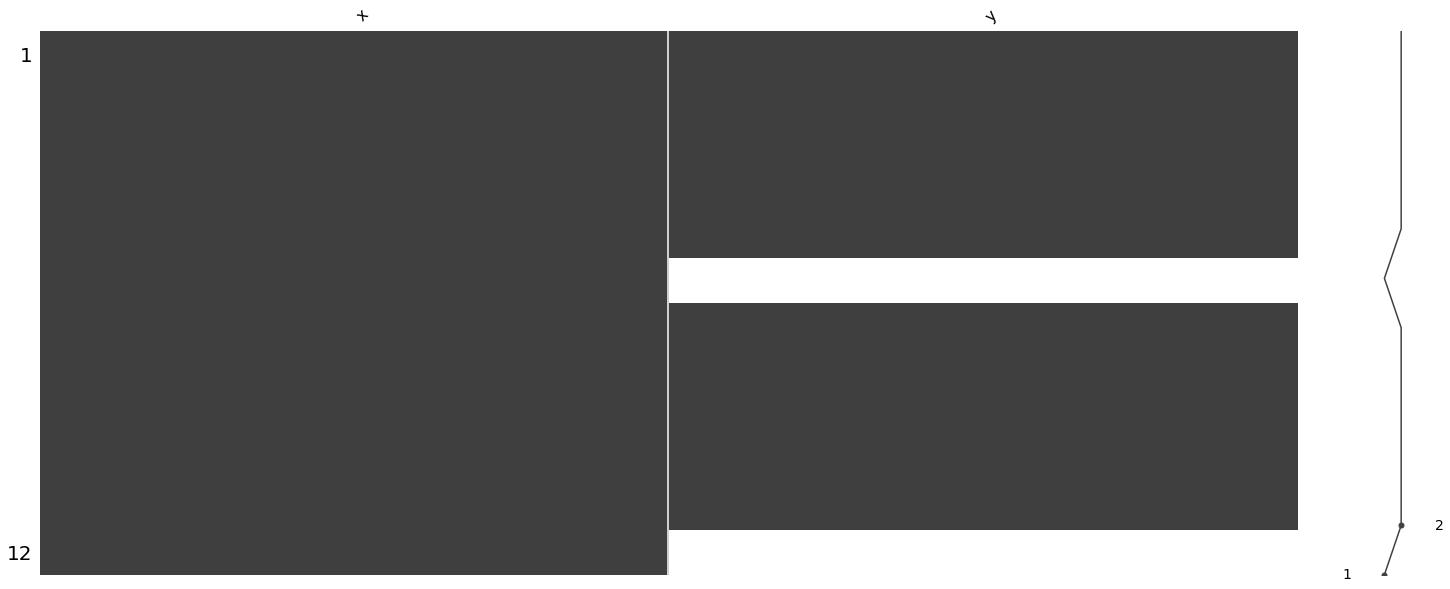

In [78]:
import missingno as msno

# Visualize missingness
msno.matrix(df)
plt.show()

In [61]:
# what time i can drop nan values ?
#   i can drop all nan values only if data is large because if i drop it not effect on data 
#   if 70 % of feature has nan values (in this case i can delete feature) 

In [62]:
# if data low and nan values alot you mustn't drop nan but fill na with [mean or median or mode]
# if data skewed the best way is [fill nan values with mode] , mode ==> is the more value which duplicated in the feature which has this nan values
# if data normal the best way is fill nan values with [mean or median]

<AxesSubplot:>

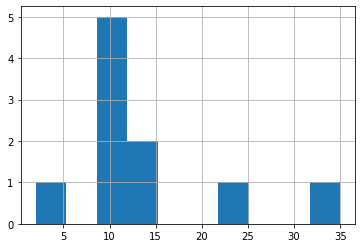

In [63]:
# here data is low then i don't drop nan values, and now will check the distributhon of data in this feature which has nan
df['y'].hist()    # here data is right skewed so i will fill nan with mode which = 10 because is the more duplicated value in this feature

In [64]:
import statistics
df['y'].fillna(statistics.mode(df['y']), inplace = True)         # here he fill nan values with [values 10]

<AxesSubplot:>

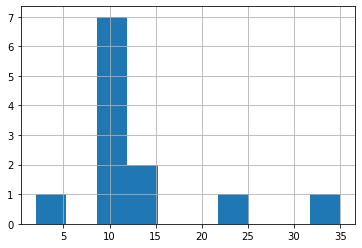

In [65]:
df['y'].hist()           # plot distubution of y feature after fill nan with mode

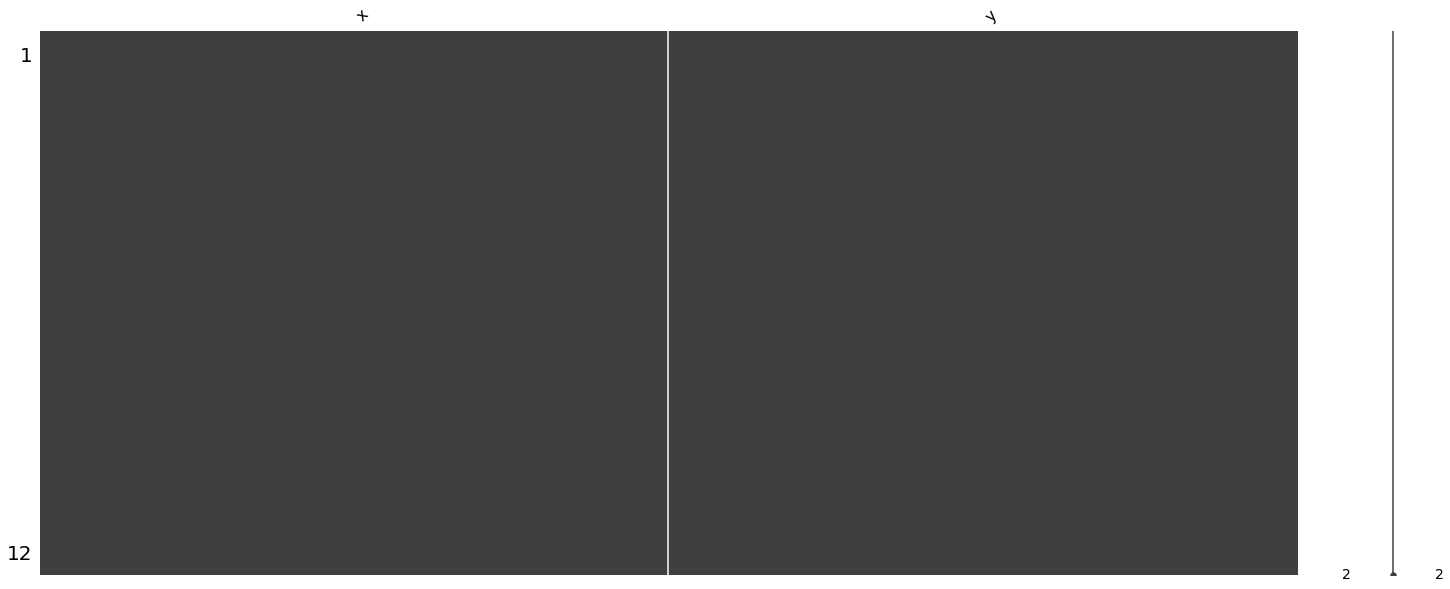

In [67]:
import missingno as msno

# Visualize missingness
msno.matrix(df)
plt.show()

## 7. <a name="7">Handling Outliears</a>

#### 1. Standard Deviation Method --- [ (Use it if data Gaussian (Normal distributed) ]
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

In [13]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3      # data after [data_std * 3] considered outliers so we remove data after it 
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


####  2. Interquartile Range Method --- [ (Use it if data not Gaussian (not Normal distributed) ]

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

In [14]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5                  # can i tune on the value (1.5) if reduce it will drop many outliers & if increase it will not drop many outliers.
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


#### 3. Drop outliers using a threshold you define or flag them

In [15]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

In [16]:
# Drop observations greater than some value
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [17]:
# Create feature based on boolean condition
houses['Outlier'] = np.where(houses['Bathrooms'] < 20, 0, 1)

# Show data
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


#### 4. Rescale using log transformation

outliers won't have same effect after log transformation

In [18]:
# Create DataFrame
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# Log feature
houses['Log_Of_Square_Feet'] = [np.log(x) for x in houses['Square_Feet']]

# Show data
houses

,Price,Bathrooms,Square_Feet,Log_Of_Square_Feet
0,534433,2.0,1500,7.313220
1,392333,3.5,2500,7.824046
2,293222,2.0,1500,7.313220
3,4322032,116.0,48000,10.778956


#### 5. DBSCAN
#### 6. Isolation Forest
#### 7. Minimum Covariance Determinant (Elliptic Envelope)
#### 8. Local Outlier Factor


## 8. <a name="8">Standardize a Features</a>

- is a noramlization way to scale [Gaussian data] which normal distributed.
- put mean = 0   &  standard deviation(variance) = 1
- equal ==> x - mean(x) / std(x) 

In [19]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])        # here the values of features are not the same range (there is values very big and other very small)

# Create scaler
scaler = StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(x)        # the values of x feature are scaled (values has been puted in same scale) -- تم تقليص الارقام 

# Show feature
standardized

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

### Another way to make standardization:

In [20]:
# Load libraries
from sklearn.preprocessing import scale
import numpy as np

# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])        # here the values of features are not the same range (there is values very big and other very small)

# Create scaler & transform the feature
scaler = scale(x)
scaler

array([[-1.26687088],
       [-0.39316683],
       [-0.17474081],
       [ 0.0436852 ],
       [ 1.79109332]])

In [21]:
from sklearn.preprocessing import normalize
#💡 Normalizer: works not on the columns, but on the rows. L2 normalization is applied to each observation so the that the values in a row have a unit norm after scaling.

## 9. <a name="9">Min Max Scalling</a>

- is a noramlization way to scale [skewed data] which not normal distributed.
- put data in range i give him [the best range i give him (0,1)].
- equal ==>  x - min(x) / max(x) - min(x)

In [22]:
# Load libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Create feature
x = np.array([[-500.5], 
              [-100.1], 
              [0], 
              [100.1], 
              [900.9]])        # here the values of features are not the same range (there is values very big and other very small)

# Create scaler
scaler = MinMaxScaler(feature_range=(0, 1))      # i told him put all numbers in specific range.

# Transform the feature
minmax_scale = scaler.fit_transform(x)        # the values of x feature are scaled (values has been puted in same scale) -- تم تقليص الارقام 

# Show feature
minmax_scale

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

### Example

In [23]:
import pandas as pd
data = pd.read_csv('D:\\ITI\\Testing Folder\\iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
from sklearn.preprocessing import MinMaxScaler

# select features which will scaled:
scaled_features = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]

# Create scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Transform the feature
minmax_scale = scaler.fit_transform(scaled_features)

# Show feature
minmax_scale

array([[0.22222222, 0.625     , 0.06779661],
       [0.16666667, 0.41666667, 0.06779661],
       [0.11111111, 0.5       , 0.05084746],
       [0.08333333, 0.45833333, 0.08474576],
       [0.19444444, 0.66666667, 0.06779661],
       [0.30555556, 0.79166667, 0.11864407],
       [0.08333333, 0.58333333, 0.06779661],
       [0.19444444, 0.58333333, 0.08474576],
       [0.02777778, 0.375     , 0.06779661],
       [0.16666667, 0.45833333, 0.08474576],
       [0.30555556, 0.70833333, 0.08474576],
       [0.13888889, 0.58333333, 0.10169492],
       [0.13888889, 0.41666667, 0.06779661],
       [0.        , 0.41666667, 0.01694915],
       [0.41666667, 0.83333333, 0.03389831],
       [0.38888889, 1.        , 0.08474576],
       [0.30555556, 0.79166667, 0.05084746],
       [0.22222222, 0.625     , 0.06779661],
       [0.38888889, 0.75      , 0.11864407],
       [0.22222222, 0.75      , 0.08474576],
       [0.30555556, 0.58333333, 0.11864407],
       [0.22222222, 0.70833333, 0.08474576],
       [0.

In [25]:
# replace features after scaled:
data[['SepalLengthCm','SepalWidthCm','PetalLengthCm']] = minmax_scale
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0.222222,0.625000,0.067797,0.2,Iris-setosa
1,2,0.166667,0.416667,0.067797,0.2,Iris-setosa
2,3,0.111111,0.500000,0.050847,0.2,Iris-setosa
3,4,0.083333,0.458333,0.084746,0.2,Iris-setosa
4,5,0.194444,0.666667,0.067797,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,0.666667,0.416667,0.711864,2.3,Iris-virginica
146,147,0.555556,0.208333,0.677966,1.9,Iris-virginica
147,148,0.611111,0.416667,0.711864,2.0,Iris-virginica
148,149,0.527778,0.583333,0.745763,2.3,Iris-virginica


## 10. <a name="10">Handling imbalanced Classes</a>

#### 1. With Upsampling

In [26]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris

In [27]:
# Load iris data
iris = load_iris()

# Create feature matrix
X = iris.data

# Create target vector
y = iris.target

In [28]:
# Make Iris Dataset Imbalanced
# Remove first 40 observations
X = X[40:,:]
y = y[40:]

# Create binary target vector indicating if class 0
y = np.where((y == 0), 0, 1)

# Look at the imbalanced target vector
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
#Upsampling Minority Class To Match Majority
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation in class 1, randomly sample from class 0 with replacement
i_class0_upsampled = np.random.choice(i_class0, size=n_class1, replace=True)

# Join together class 0's upsampled target vector with class 1's target vector
np.concatenate((y[i_class0_upsampled], y[i_class1]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

#### 2. With Downsampling

In [30]:
# Load libraries
import numpy as np
from sklearn.datasets import load_iris

In [31]:
# Load iris data
iris = load_iris()

# Create feature matrix
X = iris.data

# Create target vector
y = iris.target

In [32]:
# Make Iris Dataset Imbalanced
# Remove first 40 observations
X = X[40:,:]
y = y[40:]

# Create binary target vector indicating if class 0
y = np.where((y == 0), 0, 1)

# Look at the imbalanced target vector
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
# Downsample Majority Class To Match Minority Class
# Indicies of each class' observations
i_class0 = np.where(y == 0)[0]
i_class1 = np.where(y == 1)[0]

# Number of observations in each class
n_class0 = len(i_class0)
n_class1 = len(i_class1)

# For every observation of class 0, randomly sample from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)

# Join together class 0's target vector with the downsampled class 1's target vector
np.hstack((y[i_class0], y[i_class1_downsampled]))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### 3. Using SMOTE Technique

#### 4. Adjusting class weights for cost-sensitive learning

## 11. <a name="11">LDiscretize Features</a>

- convert Numerical features into categorical features
- convert feature from continous to discreate

In [34]:
# Load libraries
from sklearn.preprocessing import Binarizer
import numpy as np

# Create feature
age = np.array([[6], 
                [12], 
                [20], 
                [36], 
                [65]])

# Create binarizer
binarizer = Binarizer(18)

# Transform feature
binarizer.fit_transform(age)

C:\Users\nooor\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=18 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[0],
       [0],
       [1],
       [1],
       [1]])

## 12. <a name="12">Known data (Skewed or Normal)</a>

In [35]:
import pandas as pd
df = pd.read_csv('D:\\ITI\\Testing Folder\\CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
# Subset of numerical features only:
df_numeric = df[['symboling','wheelbase','carlength','carwidth','carheight','curbweight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
df_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 1. check the distribution (with skewness)
- if [ skewness > 1 ] -- such as [ wheelbase, compressionratio, horsepower, price ] are [ 'highly positively skewed' ]
- if [ skewness < -1 ] are [ 'highly negatively skewed' ]
- if [ 0.5 < skewness < 1 ] -- such as [ carwidth, curbweight, citympg ] are [ 'moderately positively skewed' ]
- if [ -0.5 < skewness < -1 ] -- such as [ stroke ] are [ 'moderately negatively skewed' ]
- if [ -0.5 < skewness < 0.5 ] -- such as [ symboling, carlength, carheight, boreration, peakrpm, highwaympg ] are [ 'normally distributed' ]

In [37]:
# return skewness per feature:
df_numeric.skew()

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

#### 2. check the distribution (with histogram)
- [ symboling, carlength, carheight, boreration, peakrpm, highwaympg ] -- [ 'normally distributed' ]
- [ wheelbase, compressionratio, horsepower, price ] -- [ 'highly positively skewed' ]
- [ carwidth, curbweight, citympg ] -- [ 'moderately positively skewed' ]
- [ stroke ] -- [ 'moderately negatively skewed' ]

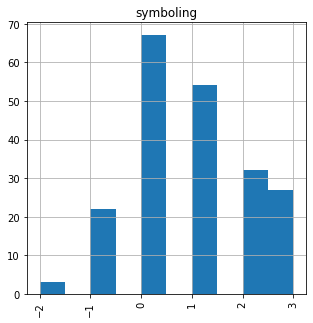

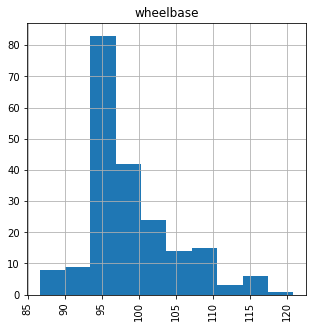

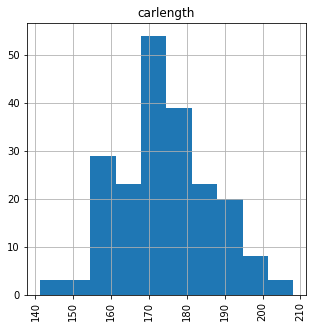

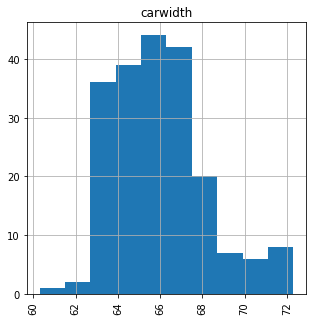

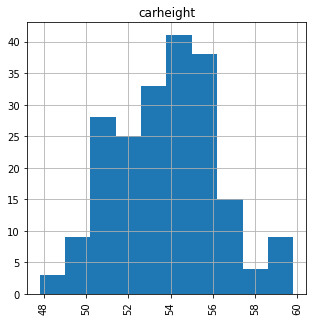

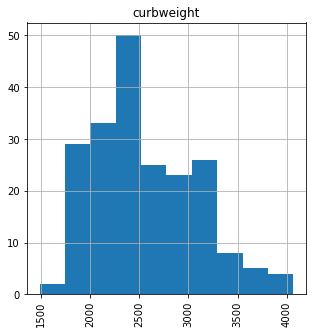

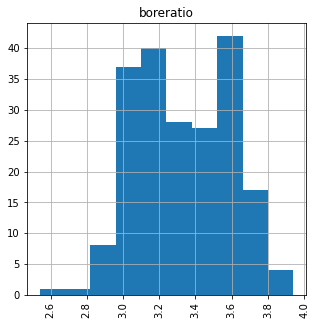

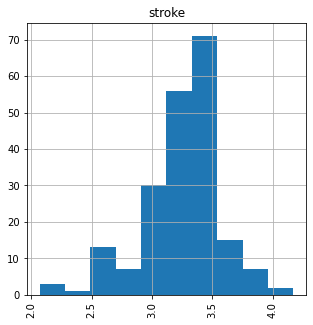

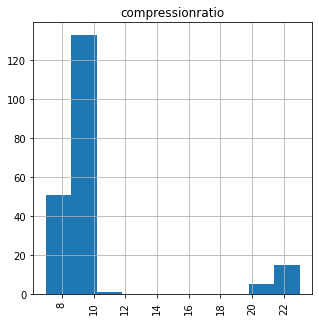

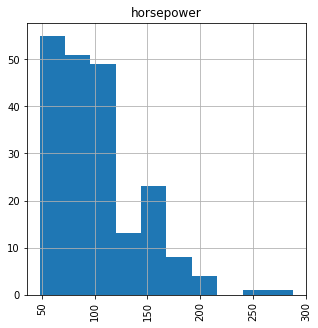

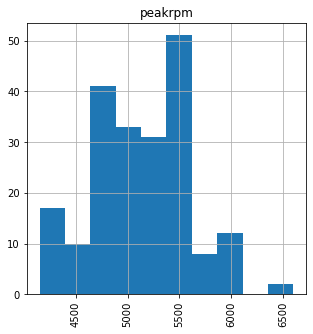

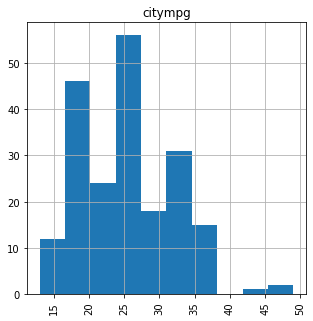

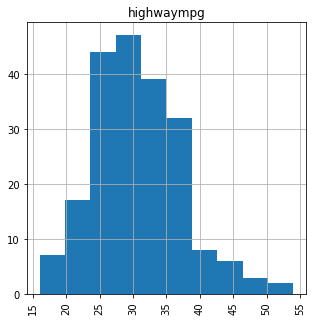

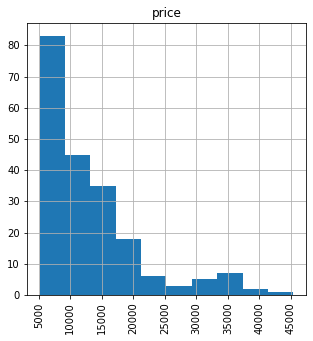

In [38]:
for i in df_numeric.columns:
    df_numeric[i].hist(xrot=90, figsize=(5,5))
    plt.title(i)
    plt.show()

## 13. <a name="13">Box-cox Transformation</a>
- it's a way to transform [ skewed distribution features ] to [ normal distribution ]

Lambda value used for Transformation: -3.0701036111613083


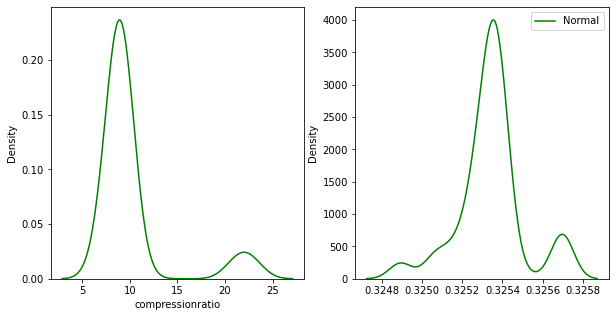

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

original_data = df['compressionratio']      # this column (compressionratio) i want to transform it to normal distribution   
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.kdeplot(original_data, label = "Non-Normal", color ="green", ax = ax[0])
  
sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")
df['compressionratio'] = fitted_data         # save changes to dataframe after transformation 

In [40]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.325339,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,0.325339,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,0.325339,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,0.325445,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,0.325172,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,0.325397,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,0.325297,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,0.325312,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,0.325700,106,4800,26,27,22470.0


Lambda value used for Transformation: -5.069774018826096
Lambda value used for Transformation: -8.479840937781395
Lambda value used for Transformation: -0.6006007081957044
Lambda value used for Transformation: 2.511511600839133
Lambda value used for Transformation: -0.604574799202489
Lambda value used for Transformation: -0.004858702359043952
Lambda value used for Transformation: -0.6280809555716815


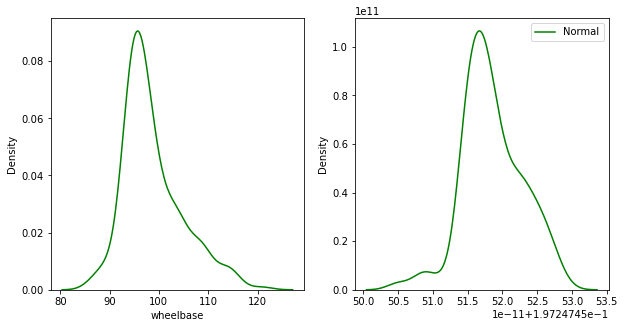

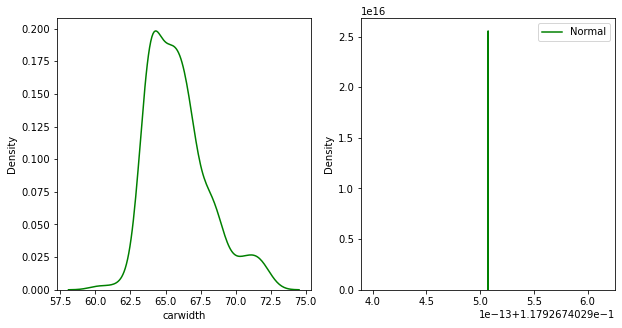

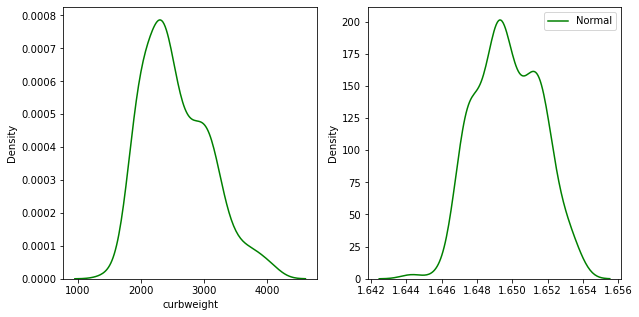

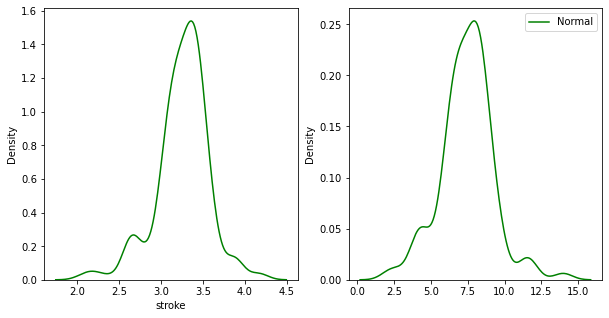

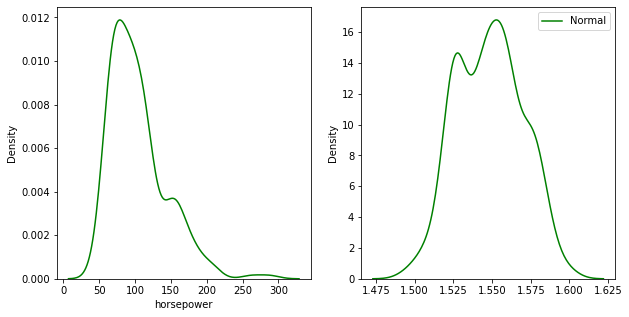

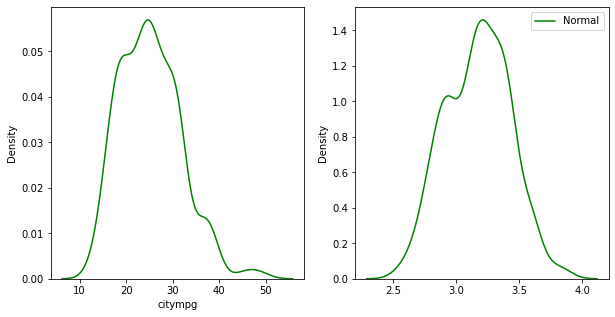

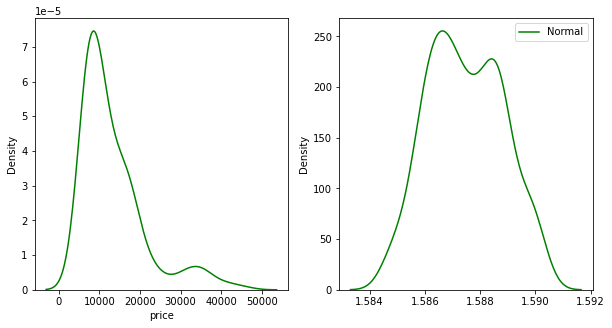

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

skewed_features = ['wheelbase','carwidth','curbweight','stroke','horsepower','citympg','price']    # i want transform the distribution of this features

for i in skewed_features:
    
    original_data = df[i]

    # transform training data & save lambda value
    fitted_data, fitted_lambda = stats.boxcox(original_data)

    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)

    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.kdeplot(original_data, label = "Non-Normal", color ="green", ax = ax[0])

    sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

    # adding legends to the subplots
    plt.legend(loc = "upper right")

    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)

    print(f"Lambda value used for Transformation: {fitted_lambda}")
    df[i] = fitted_data          # save changes to dataframe after transformation

In [42]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,0.197247,...,130,mpfi,3.47,4.336946,0.325339,1.558115,5000,3.022115,27,1.588097
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,0.197247,...,130,mpfi,3.47,4.336946,0.325339,1.558115,5000,3.022115,27,1.588578
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,0.197247,...,152,mpfi,2.68,8.661424,0.325339,1.575345,5000,2.923477,26,1.588578
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,0.197247,...,109,mpfi,3.19,8.209398,0.325445,1.553083,5500,3.153643,30,1.588181
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,0.197247,...,136,mpfi,3.19,8.209398,0.325172,1.560147,5500,2.870171,22,1.588702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,0.197247,...,141,mpfi,3.78,6.707054,0.325397,1.559650,5400,3.111731,28,1.588624
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,0.197247,...,141,mpfi,3.78,6.707054,0.325297,1.577143,5300,2.923477,25,1.588886
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,0.197247,...,173,mpfi,3.58,5.225771,0.325312,1.568439,5500,2.870171,23,1.589124
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,0.197247,...,145,idi,3.01,8.209398,0.325700,1.555404,4800,3.232444,27,1.589208


## 14. <a name="14">Log Transformation</a>
- a special case case of Box-cox transformation when lambda=0
- it's also way to transform [ skewed distribution features ] to [ normal distribution ]


In [43]:
import pandas as pd
df = pd.read_csv('D:\\ITI\\Testing Folder\\CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy import stats

# # Subset of numerical features only:
# skewed_features = ['wheelbase','carwidth','curbweight','stroke','horsepower','citympg','price']    # i want transform the distribution of this features

# for i in skewed_features:
    
#     original_data = df[i]

#     # transform training data & save lambda value
#     fitted_data, fitted_lambda = stats.boxcox(original_data, lmbda=0)

#     # creating axes to draw plots
#     fig, ax = plt.subplots(1, 2)

#     # plotting the original data(non-normal) and 
#     # fitted data (normal)
#     sns.kdeplot(original_data, label = "Non-Normal", color ="green", ax = ax[0])

#     sns.kdeplot(fitted_data, label = "Normal", color ="green", ax = ax[1])

#     # adding legends to the subplots
#     plt.legend(loc = "upper right")

#     # rescaling the subplots
#     fig.set_figheight(5)
#     fig.set_figwidth(10)

#     print(f"Lambda value used for Transformation: {0}")
#     df[i] = fitted_data          # save changes to dataframe after transformation